This dataset contains records on marathon runners from different races across the globe. Some of the question I want to answer using EDA are - 
1. Number of athletes who participated in the 50km and 100km races  
2. Number of participants in both races, categorized by gender  
3. Average speed in the 50km race  
4. Average speed in the 100km race  
5. Average speed of athletes in both races, categorized by gender  
6. Average speed of athletes based on their age and gender  
7. Difference in average speed between male and female athletes in the 50km and 100km races  
8. Age with the highest average speed  
9. Age with the highest average speed by gender  
10. Age with the lowest average speed  
11. Are runners faster in different seasons?  

### Importing the required libraries

In [64]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pylab as plt

### Reading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv")

/tmp/ipykernel_36/3197416782.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv")


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [4]:
df.shape

(7461195, 13)

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [6]:
df['Event name'].value_counts()

Event name
Two Oceans Marathon (RSA)                               263574
Comrades Marathon - Down Run (RSA)                      224491
Comrades Marathon - Up Run (RSA)                        221162
100 km Lauf Biel (SUI)                                  100657
Two Oceans Marathon - 50km Split (RSA)                   84737
                                                         ...  
Ultramaratona del Tricolore - Giorno 4 -50km (ITA)           1
Qinling Training VK Training - Woman 18 (CHN)                1
UMF Winter Edition - 1000 Miles (ITA)                        1
Six-Days-Colac - 1000km Split (AUS)                          1
RRC Invitation 24 Hour Track Race - 50mi Split (GBR)         1
Name: count, Length: 26907, dtype: int64

### Cleaning up dataset

In [7]:
df[df['Event distance/length'] == '50']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID


In [8]:
# getting all the data with 50km and 50mi
df[df['Event distance/length'].isin(['50km','50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [9]:
# getting all the data with 100km and 100mi
df[df['Event distance/length'].isin(['100km','100mi'])]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1036,2018,24.-25.03.2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,30:27:00 h,NaN,USA,1991.0,M,M23,5.285,1034
1037,2018,24.-25.03.2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,46:24:00 h,NaN,USA,1970.0,F,W45,3.468,1035
1038,2018,24.-25.03.2018,Extreme North Dakota Sandhills Ultra Run Exper...,100mi,3,46:24:00 h,NaN,USA,1980.0,M,M35,3.468,1036
1039,2018,24.-25.03.2018,Extreme North Dakota Sandhills Ultra Run Exper...,100km,3,17:20:00 h,NaN,USA,1979.0,M,M35,5.769,1037
1040,2018,24.-25.03.2018,Extreme North Dakota Sandhills Ultra Run Exper...,100km,3,18:29:00 h,NaN,CAN,1983.0,M,M23,5.41,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460925,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:12:46 h,SGW Stuttgart,GER,1940.0,M,M50,7568.0,1052562
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941.0,M,M50,7145.0,1074986
7460927,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:47 h,Cslg Marseille,FRA,NaN,M,NaN,7145.0,1641151
7460928,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,14:01:36 h,NaN,SUI,1945.0,M,M45,7129.0,1046259


In [10]:
# finding races that are 50km,50mi,100km,100mi from 2019-2022
df[(df['Event distance/length'].isin(['50km','50mi','100km','100mi'])) & ((df['Year of event'] >= 2019) & (df['Year of event'] <= 2022))]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1806215,2019,09.03.2019,Marathon of Marathons 100km Belgrade - 50km Sp...,50km,1,3:12:50 h,Mirca Sport,ESP,1991.0,M,M23,15.557,114700
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,4:43:04 h,"*Stuarts Draft, VA",USA,1976.0,M,M40,10.598,145423
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:04:11 h,"*Winston Salem, NC",JPN,1968.0,M,M50,9.862,23412
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:23:03 h,"*Greenville, SC",USA,1964.0,M,M50,9.286,3886
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:28:37 h,"*Elizabethton, TN",USA,1969.0,F,W50,9.129,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609801,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:16:08 h,"*Peachtree City, GA",USA,1968.0,M,M50,7.141,1044739
3609802,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:27:05 h,"*Newport, PA",USA,1959.0,M,M60,7.027,50971
3609803,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:46:34 h,"*Flemington, NJ",USA,1955.0,F,W65,6.833,73152
3609804,2022,16.10.2022,Tussey Mountainback 50 Miler (USA),50mi,35,11:55:29 h,"*Arlington, VA",USA,1965.0,M,M55,6.748,970133


In [11]:
# getting all the races with an Indian country code
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'IND']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
21569,2018,11.03.2018,Tech City Marathon (IND),65km,19,5:09:19 h,NaN,IND,1994.0,M,M23,12.608,20538
21570,2018,11.03.2018,Tech City Marathon (IND),65km,19,5:45:47 h,NaN,IND,1984.0,M,M23,11.279,20539
21571,2018,11.03.2018,Tech City Marathon (IND),65km,19,6:07:35 h,NaN,IND,1992.0,M,M23,10.61,20540
21572,2018,11.03.2018,Tech City Marathon (IND),65km,19,6:09:07 h,NaN,IND,1995.0,M,MU23,10.566,20541
21573,2018,11.03.2018,Tech City Marathon (IND),65km,19,6:27:16 h,NaN,IND,1982.0,M,M35,10.071,20542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826460,1951,08.03.1951,Asian Games 50 Km Walking (IND),50km,3,5:44:17 h,NaN,IND,NaN,M,NaN,8714.0,1521670
6826461,1951,08.03.1951,Asian Games 50 Km Walking (IND),50km,3,5:54:48 h,racewalker,JPN,NaN,M,NaN,8455.0,1521671
6964319,1982,01.12.1982,Asian Games 50 Km Walking (IND),50km,3,4:09:36 h,racewalker,CHN,NaN,M,NaN,12019.0,1569755
6964320,1982,01.12.1982,Asian Games 50 Km Walking (IND),50km,3,4:19:43 h,NaN,CHN,1961.0,M,MU23,11551.0,1569756


In [12]:
# combining the 3 filters above 
df[(df['Event distance/length'].isin(['50km','50mi','100km','100mi'])) & ((df['Year of event'] >= 2019) & (df['Year of event'] <= 2022)) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'IND')]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1824183,2019,24.02.2019,Tata Ultra Marathon (IND),50km,288,3:43:07 h,*Mumbai,IND,1990.0,M,M23,13.446,357585
1824184,2019,24.02.2019,Tata Ultra Marathon (IND),50km,288,3:50:53 h,*Mumbai,IND,1990.0,M,M23,12.994,651009
1824185,2019,24.02.2019,Tata Ultra Marathon (IND),50km,288,3:51:44 h,*Katni,IND,1998.0,M,MU23,12.946,651010
1824186,2019,24.02.2019,Tata Ultra Marathon (IND),50km,288,4:02:17 h,*Ahemdabad,IND,1988.0,M,M23,12.382,40974
1824187,2019,24.02.2019,Tata Ultra Marathon (IND),50km,288,4:13:41 h,*Belgaum,IND,1980.0,M,M35,11.826,303018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517261,2022,18.09.2022,Mukteshwar Ultra Marathon (IND),50km,25,7:46:00 h,NaN,IND,1975.0,M,M45,6.438,1025337
3517262,2022,18.09.2022,Mukteshwar Ultra Marathon (IND),50km,25,7:47:00 h,NaN,IND,1986.0,M,M35,6.424,322344
3517263,2022,18.09.2022,Mukteshwar Ultra Marathon (IND),50km,25,8:10:00 h,NaN,IND,1985.0,M,M35,6.122,1025338
3517264,2022,18.09.2022,Mukteshwar Ultra Marathon (IND),50km,25,8:11:00 h,NaN,IND,1996.0,M,M23,6.11,1025339


In [13]:
# creating a new dataframe with the filtered data 
df_fil = df[(df['Event distance/length'].isin(['50km','50mi','100km','100mi'])) & ((df['Year of event'] >= 2019) & (df['Year of event'] <= 2022)) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'IND')]


In [14]:
df_fil.shape

(2525, 13)

In [15]:
# removing (IND) from event name 
df_fil['Event name'].str.split('(').str.get(0)

1824183          Tata Ultra Marathon 
1824184          Tata Ultra Marathon 
1824185          Tata Ultra Marathon 
1824186          Tata Ultra Marathon 
1824187          Tata Ultra Marathon 
                      ...            
3517261    Mukteshwar Ultra Marathon 
3517262    Mukteshwar Ultra Marathon 
3517263    Mukteshwar Ultra Marathon 
3517264    Mukteshwar Ultra Marathon 
3517265    Mukteshwar Ultra Marathon 
Name: Event name, Length: 2525, dtype: object

In [16]:
# updating the event name 
df_fil['Event name'] = df_fil['Event name'].str.split('(').str.get(0)

/tmp/ipykernel_36/1742554198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['Event name'] = df_fil['Event name'].str.split('(').str.get(0)


In [17]:
df_fil

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1824183,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:43:07 h,*Mumbai,IND,1990.0,M,M23,13.446,357585
1824184,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:50:53 h,*Mumbai,IND,1990.0,M,M23,12.994,651009
1824185,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:51:44 h,*Katni,IND,1998.0,M,MU23,12.946,651010
1824186,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:02:17 h,*Ahemdabad,IND,1988.0,M,M23,12.382,40974
1824187,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:13:41 h,*Belgaum,IND,1980.0,M,M35,11.826,303018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517261,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,7:46:00 h,NaN,IND,1975.0,M,M45,6.438,1025337
3517262,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,7:47:00 h,NaN,IND,1986.0,M,M35,6.424,322344
3517263,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,8:10:00 h,NaN,IND,1985.0,M,M35,6.122,1025338
3517264,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,8:11:00 h,NaN,IND,1996.0,M,M23,6.11,1025339


In [18]:
# creating a new column to store the ages of the athletes 
df_fil['athlete_age'] = df['Year of event'] - df_fil['Athlete year of birth']

/tmp/ipykernel_36/1653400821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil['athlete_age'] = df['Year of event'] - df_fil['Athlete year of birth']


In [19]:
df_fil.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
1824183,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:43:07 h,*Mumbai,IND,1990.0,M,M23,13.446,357585,29.0
1824184,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:50:53 h,*Mumbai,IND,1990.0,M,M23,12.994,651009,29.0
1824185,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:51:44 h,*Katni,IND,1998.0,M,MU23,12.946,651010,21.0
1824186,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:02:17 h,*Ahemdabad,IND,1988.0,M,M23,12.382,40974,31.0
1824187,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:13:41 h,*Belgaum,IND,1980.0,M,M35,11.826,303018,39.0


In [20]:
df_fil.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID',
       'athlete_age'],
      dtype='object')

In [21]:
# drop columns  - athlete club, athlete country, athlete year of birth, athlete age category
df_fil = df_fil.drop(['Athlete club','Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

In [22]:
df_fil.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
1824183,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:43:07 h,M,13.446,357585,29.0
1824184,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:50:53 h,M,12.994,651009,29.0
1824185,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:51:44 h,M,12.946,651010,21.0
1824186,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:02:17 h,M,12.382,40974,31.0
1824187,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:13:41 h,M,11.826,303018,39.0


In [23]:
df_fil.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  739
dtype: int64

In [24]:
# finding the records with the NaN values 
df_fil[df_fil['athlete_age'].isna() == 1]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
1828290,2019,23.02.2019,BNP Ultra,50km,98,4:12:00 h,M,11.905,148398,NaN
1828291,2019,23.02.2019,BNP Ultra,50km,98,4:20:15 h,M,11.527,54460,NaN
1828297,2019,23.02.2019,BNP Ultra,50km,98,4:54:09 h,M,10.199,652012,NaN
1828300,2019,23.02.2019,BNP Ultra,50km,98,4:57:52 h,M,10.072,652014,NaN
1828301,2019,23.02.2019,BNP Ultra,50km,98,5:04:42 h,M,9.846,652015,NaN
...,...,...,...,...,...,...,...,...,...,...
3311081,2022,24.04.2022,Ruggedian Kolhapur Run,50km,60,6:56:37 h,M,7.201,981386,NaN
3311082,2022,24.04.2022,Ruggedian Kolhapur Run,50km,60,6:57:18 h,M,7.189,981387,NaN
3311083,2022,24.04.2022,Ruggedian Kolhapur Run,50km,60,7:08:36 h,M,7,981388,NaN
3401220,2022,07.09.2022,Jalahalli 50km Walking,50km,4,4:39:21 h,M,10.739,1001017,NaN


In [25]:
#Removing the records with NaN
df_fil = df_fil.dropna()

In [26]:
df_fil.shape

(1786, 10)

In [27]:
# checking for duplicate records 
df_fil[df_fil.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [28]:
# reset the index of the dataframe 
df_fil.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:43:07 h,M,13.446,357585,29.0
1,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:50:53 h,M,12.994,651009,29.0
2,2019,24.02.2019,Tata Ultra Marathon,50km,288,3:51:44 h,M,12.946,651010,21.0
3,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:02:17 h,M,12.382,40974,31.0
4,2019,24.02.2019,Tata Ultra Marathon,50km,288,4:13:41 h,M,11.826,303018,39.0
...,...,...,...,...,...,...,...,...,...,...
1781,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,7:46:00 h,M,6.438,1025337,47.0
1782,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,7:47:00 h,M,6.424,322344,36.0
1783,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,8:10:00 h,M,6.122,1025338,37.0
1784,2022,18.09.2022,Mukteshwar Ultra Marathon,50km,25,8:11:00 h,M,6.11,1025339,26.0


In [29]:
df_fil['Event distance/length'].value_counts()

Event distance/length
50km     1472
100km     286
100mi      28
Name: count, dtype: int64

In [30]:
df_fil.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [31]:
# fix types 
# change athelte age from float to int 
df_fil['athlete_age'] = df_fil['athlete_age'].astype(int)
# change avg speed to float 
df_fil['Athlete average speed'] = df_fil['Athlete average speed'].astype(float)

In [32]:
df_fil.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int64
dtype: object

In [33]:
# rename the columns 
df_fil = df_fil.rename(columns = {
    'Year of event':'event_year',
    'Event dates':'event_dates',
    'Event name':'event_name',
    'Event distance/length':'event_distance',
    'Event number of finishers':'event_finishers',
    'Athlete performance':'athlete_performance',
    'Athlete gender':'athlete_gender',
    'Athlete average speed':'athlete_avgspeed',
    'Athlete ID':'athlete_id'
     
})

In [34]:
df_fil.columns

Index(['event_year', 'event_dates', 'event_name', 'event_distance',
       'event_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_avgspeed', 'athlete_id', 'athlete_age'],
      dtype='object')

In [35]:
# reordering the columns into a new dataframe
df_order = df_fil[['event_name','event_year', 'event_dates', 'event_distance',
       'event_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_avgspeed', 'athlete_id', 'athlete_age']]

In [36]:
df_order['athlete_gender'].value_counts()

athlete_gender
M    1590
F     196
Name: count, dtype: int64

### Answering questions with data

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='event_distance', ylabel='Count'>

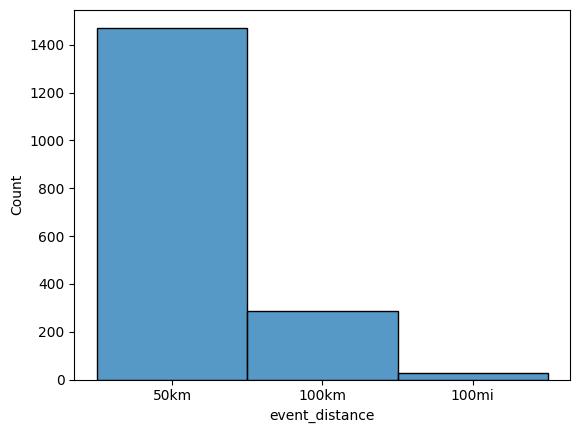

In [37]:
# Number of athletes who participated in the 50km and 100km races
sns.histplot(df_order['event_distance'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='event_distance', ylabel='Count'>

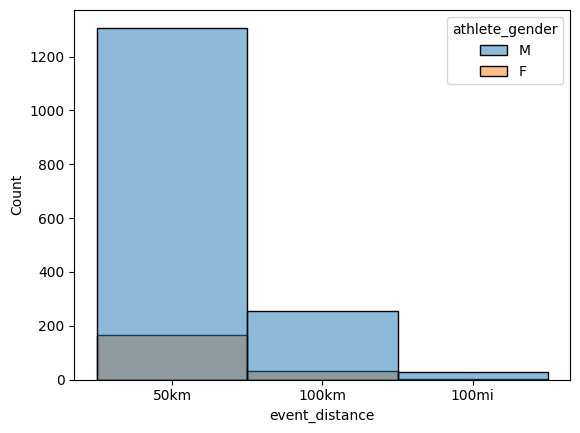

In [38]:
# Number of participants in both races, categorized by gender
sns.histplot(df_order,x = 'event_distance',hue = 'athlete_gender')

/tmp/ipykernel_36/1729121196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_order[df_order['event_distance'] == '50km']['athlete_avgspeed'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='athlete_avgspeed', ylabel='Density'>

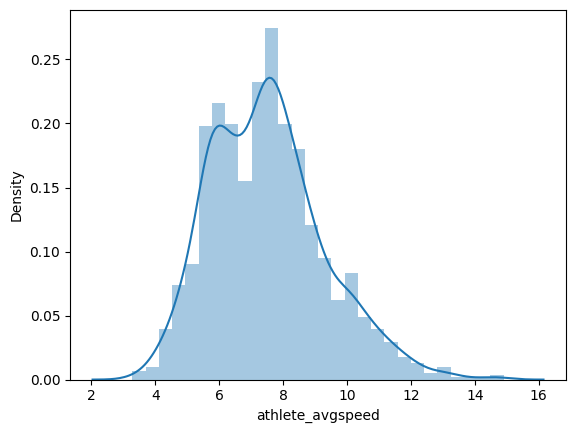

In [39]:
# Average speed in the 50km race
sns.distplot(df_order[df_order['event_distance'] == '50km']['athlete_avgspeed'])

/tmp/ipykernel_36/2047998592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_order[df_order['event_distance'] == '100km']['athlete_avgspeed'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='athlete_avgspeed', ylabel='Density'>

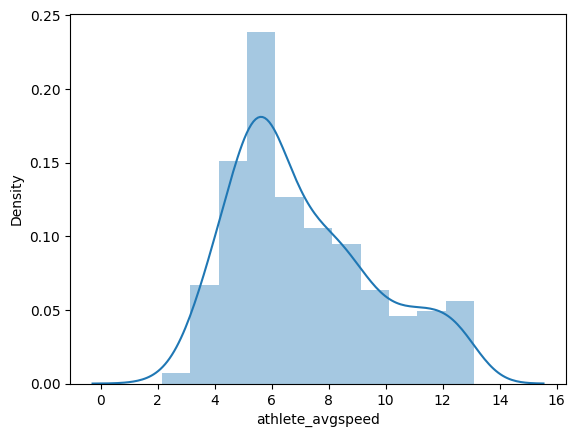

In [40]:
# Average speed in the 100km race 
sns.distplot(df_order[df_order['event_distance'] == '100km']['athlete_avgspeed'])

<Axes: xlabel='event_distance', ylabel='athlete_avgspeed'>

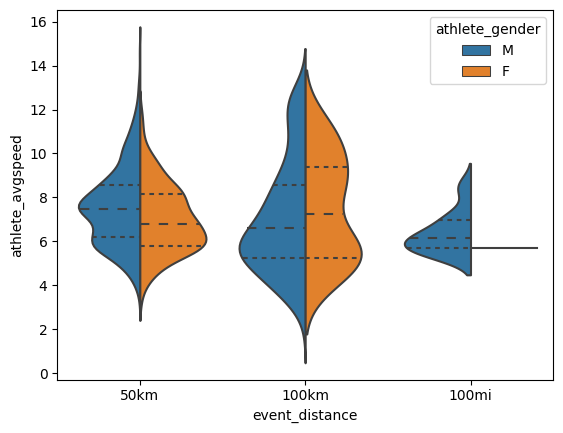

In [41]:
# Average speed of athletes in both races, categorized by gender
sns.violinplot(data = df_order,x='event_distance',y='athlete_avgspeed',hue = 'athlete_gender',split=True,inner = 'quart',line_width = 1)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


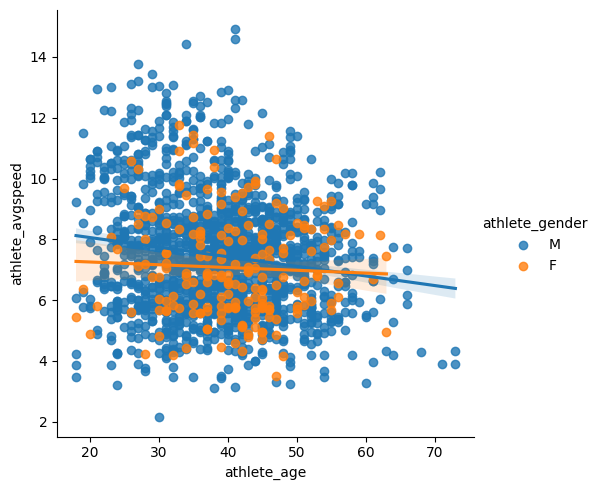

In [42]:
# Average speed of athletes based on their age and gender 
sns.lmplot(data=df_order,x='athlete_age',y='athlete_avgspeed',hue='athlete_gender')

In [43]:
# Difference in average speed between male and female athletes in the 50km and 100km races 
df_order.groupby(['event_distance','athlete_gender'])['athlete_avgspeed'].mean()

event_distance  athlete_gender
100km           F                 7.456516
                M                 7.066043
100mi           F                 5.684000
                M                 6.375444
50km            F                 7.001067
                M                 7.561939
Name: athlete_avgspeed, dtype: float64

In [103]:
# mean - average speed
# count - number of athletes with the avg speed
# Age with the highest average speed in 50km 
df_order.query('event_distance == "50km"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>5').head()

,mean,count
athlete_age,,
21,8.793500,12
20,8.503636,11
22,8.270867,15
25,8.265950,20
49,8.070658,38


In [104]:
# Age with the highest average speed in 100km 
df_order.query('event_distance == "100km"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>5').head()

,mean,count
athlete_age,,
26,10.006818,11
36,9.201625,8
25,9.046143,7
29,9.009714,7
27,8.724000,9


In [90]:
# Age with the highest average speed in 50km for females 
df_order.query('event_distance == "50km" & athlete_gender == "F"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>5').head()

,mean,count
athlete_age,,
37,7.337875,8
46,7.197625,8
39,7.147600,10
36,7.139500,8
44,7.052222,9


In [92]:
# Age with the highest average speed in 50km for males
df_order.query('event_distance == "50km" & athlete_gender == "M"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>5').head()

,mean,count
athlete_age,,
21,9.063727,11
20,8.866400,10
22,8.270867,15
25,8.265950,20
49,8.068378,37


In [93]:
# Age with the highest average speed in 100km for males
df_order.query('event_distance == "100km" & athlete_gender == "M"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>5').head()

,mean,count
athlete_age,,
26,10.006818,11
36,9.201625,8
29,9.009714,7
25,8.939500,6
31,8.556333,15


In [102]:
# Age with the highest average speed in 100km for females
df_order.query('event_distance == "100km" & athlete_gender == "F"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>2').head()

,mean,count
athlete_age,,
27,9.218000,3
42,6.749000,4
37,5.297667,3


In [98]:
df_order[['event_distance','athlete_gender']].value_counts()

event_distance  athlete_gender
50km            M                 1308
100km           M                  255
50km            F                  164
100km           F                   31
100mi           M                   27
                F                    1
Name: count, dtype: int64

In [100]:
df_order.query('event_distance == "100km" & athlete_gender == "F"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>2').head()

,mean,count
athlete_age,,
27,9.218000,3
42,6.749000,4
37,5.297667,3


In [88]:
# Age with the lowest average speed
df_order.query('event_distance == "50km"').groupby('athlete_age')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count>5').head()

,,mean,count
athlete_age,athlete_gender,,
45,F,6.352083,12
43,F,6.621286,7
53,M,6.659692,13
47,F,6.682500,6
41,F,6.682750,8


In [79]:
# Are runners faster in different seasons?
df_order['event_month'] = df_order['event_dates'].str.split('.')
df_order['event_month'] = np.where(df_order['event_month'].str.get(1).str.isdigit(),df_order['event_month'].str.get(1).astype(int),df_order['event_month'].str.get(2).astype(int))

/tmp/ipykernel_36/826395934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['event_month'] = df_order['event_dates'].str.split('.')
/tmp/ipykernel_36/826395934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['event_month'] = np.where(df_order['event_month'].str.get(1).str.isdigit(),df_order['event_month'].str.get(1).astype(int),df_order['event_month'].str.get(2).astype(int))


In [80]:
df_order

,event_name,event_year,event_dates,event_distance,event_finishers,athlete_performance,athlete_gender,athlete_avgspeed,athlete_id,athlete_age,event_month,event_season
1824183,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:43:07 h,M,13.446,357585,29,2,Winter
1824184,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:50:53 h,M,12.994,651009,29,2,Winter
1824185,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:51:44 h,M,12.946,651010,21,2,Winter
1824186,Tata Ultra Marathon,2019,24.02.2019,50km,288,4:02:17 h,M,12.382,40974,31,2,Winter
1824187,Tata Ultra Marathon,2019,24.02.2019,50km,288,4:13:41 h,M,11.826,303018,39,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
3517261,Mukteshwar Ultra Marathon,2022,18.09.2022,50km,25,7:46:00 h,M,6.438,1025337,47,9,Monsoon
3517262,Mukteshwar Ultra Marathon,2022,18.09.2022,50km,25,7:47:00 h,M,6.424,322344,36,9,Monsoon
3517263,Mukteshwar Ultra Marathon,2022,18.09.2022,50km,25,8:10:00 h,M,6.122,1025338,37,9,Monsoon
3517264,Mukteshwar Ultra Marathon,2022,18.09.2022,50km,25,8:11:00 h,M,6.110,1025339,26,9,Monsoon


In [74]:
df_order['event_season'] = df_order['event_month'].apply(lambda x:'Winter' if x >= 12 else 'Monsoon' if x >= 6 else 'Summer' if x >= 3 else 'Winter' )

/tmp/ipykernel_36/571758331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['event_season'] = df_order['event_month'].apply(lambda x:'Winter' if x >= 12 else 'Monsoon' if x >= 6 else 'Summer' if x >= 3 else 'Winter' )


In [82]:
df_order.head()

,event_name,event_year,event_dates,event_distance,event_finishers,athlete_performance,athlete_gender,athlete_avgspeed,athlete_id,athlete_age,event_month,event_season
1824183,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:43:07 h,M,13.446,357585,29,2,Winter
1824184,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:50:53 h,M,12.994,651009,29,2,Winter
1824185,Tata Ultra Marathon,2019,24.02.2019,50km,288,3:51:44 h,M,12.946,651010,21,2,Winter
1824186,Tata Ultra Marathon,2019,24.02.2019,50km,288,4:02:17 h,M,12.382,40974,31,2,Winter
1824187,Tata Ultra Marathon,2019,24.02.2019,50km,288,4:13:41 h,M,11.826,303018,39,2,Winter


In [83]:
# In which season did the athletes run the fastest
df_order.groupby('event_season')['athlete_avgspeed'].agg(['mean','count']).sort_values('mean',ascending=False)

,mean,count
event_season,,
Winter,7.634346,1166
Summer,7.142847,340
Monsoon,6.856393,280
